# Introducing external gate to the ASIC
after help from Ricardo (PETsys team)
Nov-11,2020

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/DuSci/Figures/'
%config InlineBackend.figure_format = 'retina'
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.extTrg/Figures/'

In [73]:
data_path = '/Users/erezcohen/Desktop/data/PETsys/external_trigger/after_PETsys_help/'
ExtTrg_2ms_gate = pd.read_csv(data_path+'trigger_rate0.1kHz_amp1250mV_offset1250mV_dutyCycle20_10sec_singles.txt',
                          delimiter='\t',names=['time','charge','channel'])
ExtTrg_5ms_gate = pd.read_csv(data_path+'trigger_rate0.1kHz_amp1250mV_offset1250mV_dutyCycle50_10sec_singles.txt',
                          delimiter='\t',names=['time','charge','channel'])

In [74]:
ExtTrg_2ms_gate['trigger'] = 0
ExtTrg_2ms_gate[(ExtTrg_2ms_gate.channel==4128)]['trigger'] = 1
ExtTrg_5ms_gate['trigger'] = 0
ExtTrg_5ms_gate[(ExtTrg_5s_gate.channel==4128)]['trigger'] = 1
ExtTrg_5ms_gate[0:5]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,time,charge,channel,trigger
0,607175187500,1.0,4128,0
1,612174531250,-1.0,4128,0
2,617175177500,1.0,4128,0
3,622174522500,-1.0,4128,0
4,627175127500,1.0,4128,0


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1.extTrg/Figures/ext_gate_and_LYSO_internal_activity.pdf


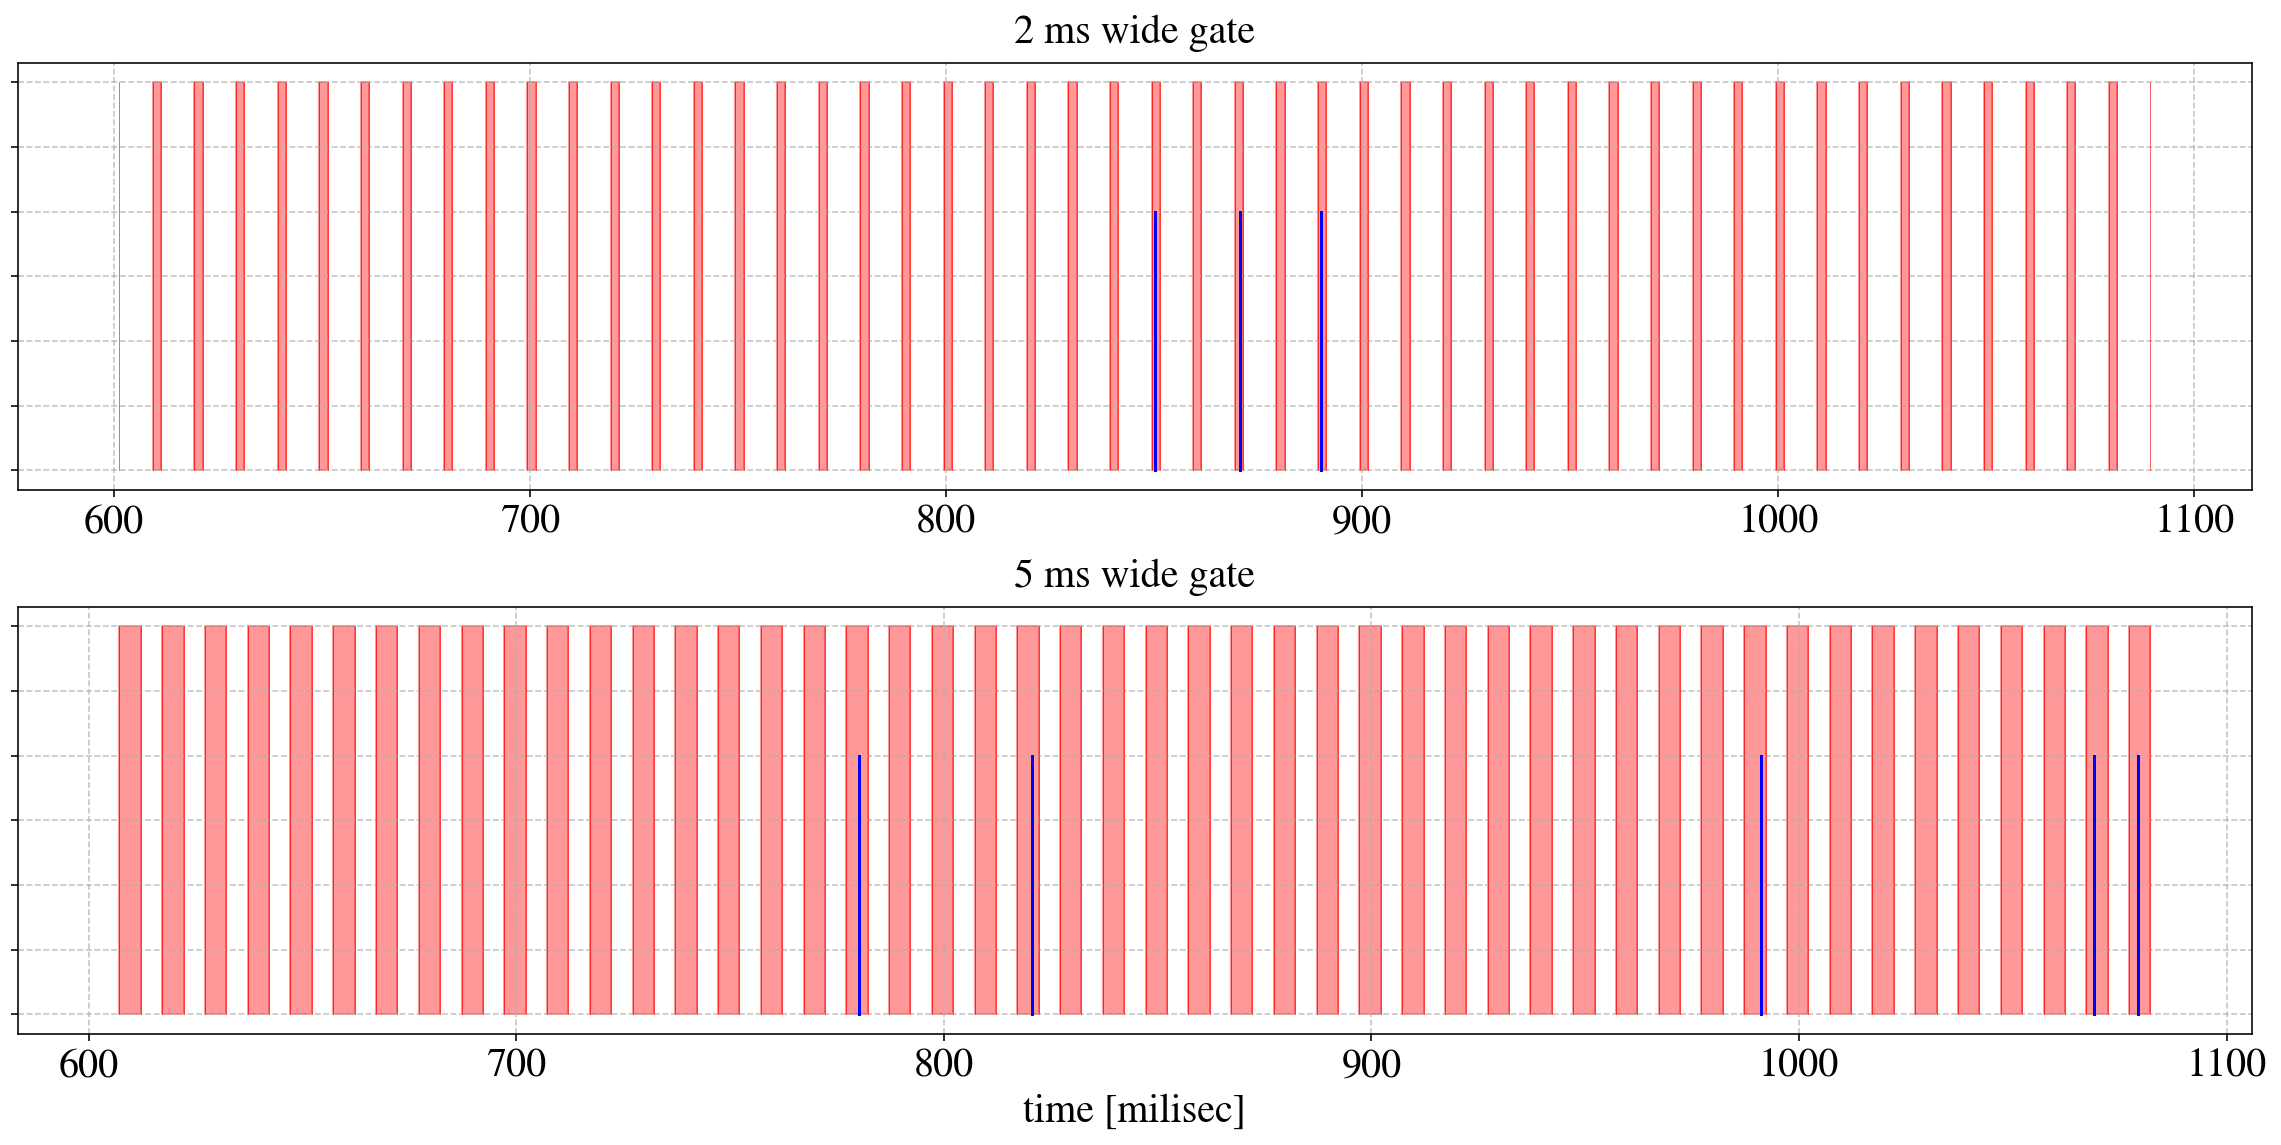

In [99]:
sec = 1.e12
milisec = sec*1e-3

fig=plt.figure(figsize=(16,8)); 

for i,df,data_title,gate_dt in zip([1,2],[ExtTrg_2ms_gate,ExtTrg_5ms_gate],                           
                                   ['2 ms wide gate','5 ms wide gate'],
                                   [2.*milisec,5.*milisec]):
    df = df[0:101]
    ax = fig.add_subplot(2,1,i)
    data = df[df.channel!=4128];
    for t in [data.time]:
        plt.plot( [t/milisec,t/milisec] , [0,0.2] , 'b')

    trigger = df[df.channel==4128];
    for t in [trigger.time]:
        plt.plot( [t/milisec,t/milisec] , [0,0.3] , color='r', linewidth=0.3)

    t = np.array(trigger.time)
    for tIdx in np.arange(1 if i==1 else 0,len(t)-1,2):     
        plt.fill_between( [t[tIdx]/milisec,t[tIdx+1]/milisec] , 
                         y1=[0,0], y2=[0.3,0.3] , color='r', alpha=0.4) 

    set_axes(ax=ax,x_label='time [milisec]' if i==2 else '',
             y_label='',remove_ticks_y=True, 
             fontsize=20,do_add_grid=True,title=data_title);
    
plt.tight_layout()
save_figure(filename = main_figures_path + 'ext_gate_and_LYSO_internal_activity.pdf')

In [46]:
t[tIdx]/sec,t[tIdx]/sec + gate_dt/sec

(0.80942048, 0.80944048)